In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())




['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [13]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']

print(num_features)
print(cat_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
print('we have {} numerical features :{}'.format(len(num_features),num_features))
print('we have {} categorical features :{}'.format(len(cat_features),cat_features))

we have 3 numerical features :['math_score', 'reading_score', 'writing_score']
we have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [17]:
math_full=df[df['math_score']==100]['gender'].count()
reading_full=df[df['reading_score']==100]['gender'].count()
writing_full=df[df['writing_score']==100]['gender'].count()

print (math_full)
print (reading_full)
print (writing_full)
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

7
17
14
Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20=df[df['reading_score']<=20]['parental_level_of_education'].count()
math_less_20=df[df['math_score']<=20]['parental_level_of_education'].count()
writing_less_20=df[df['writing_score']<=20]['parental_level_of_education'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


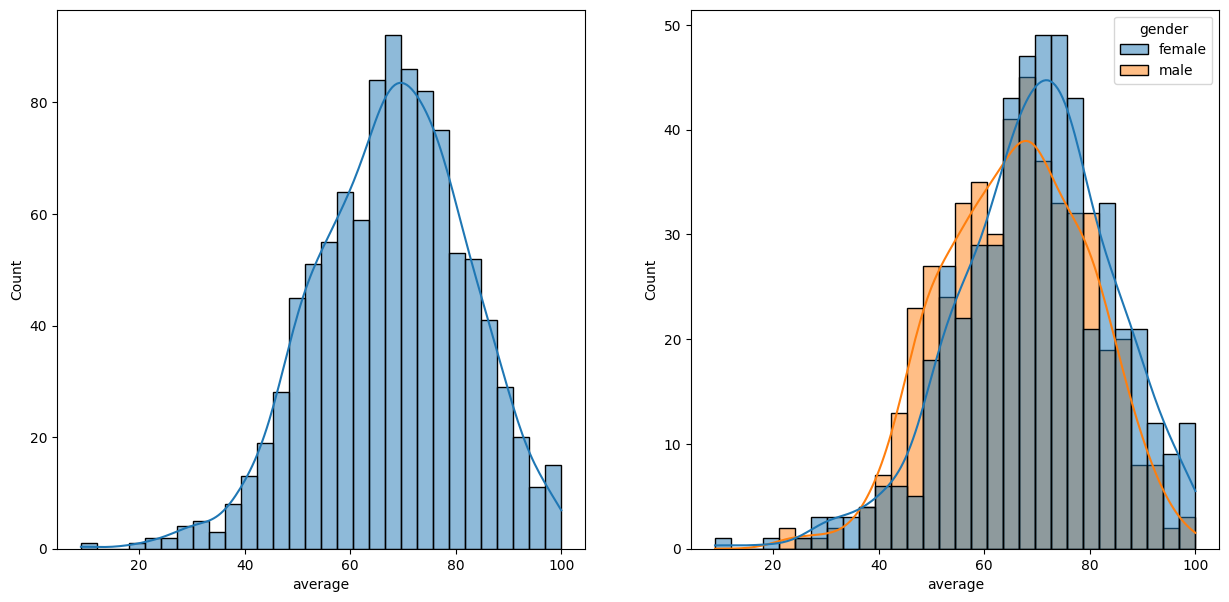

In [19]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()


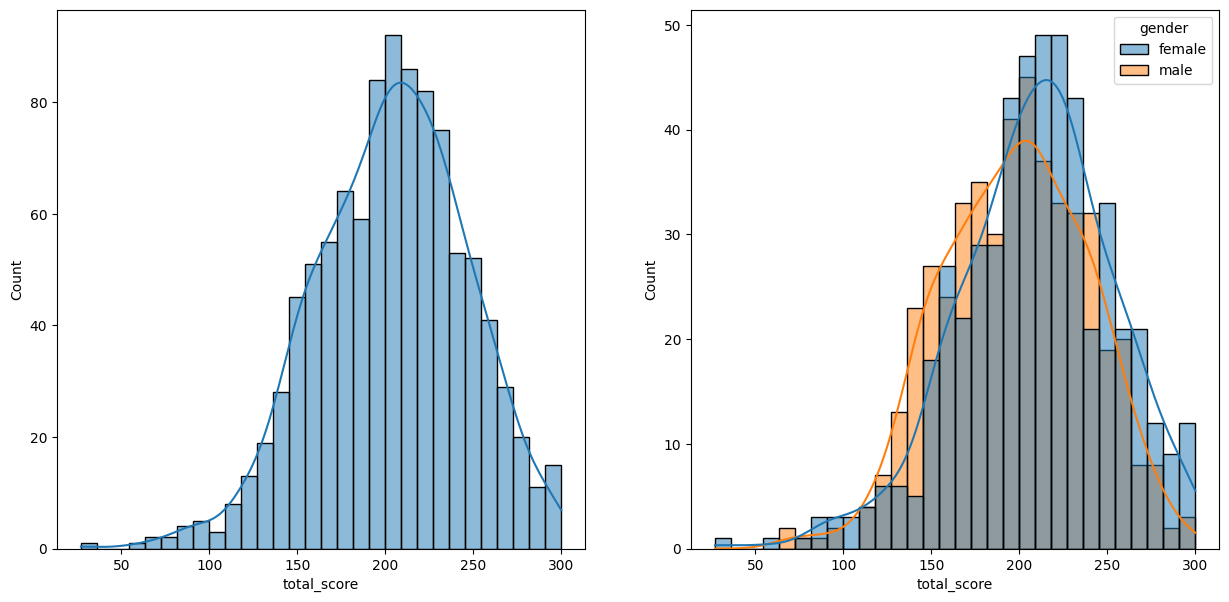

In [20]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()

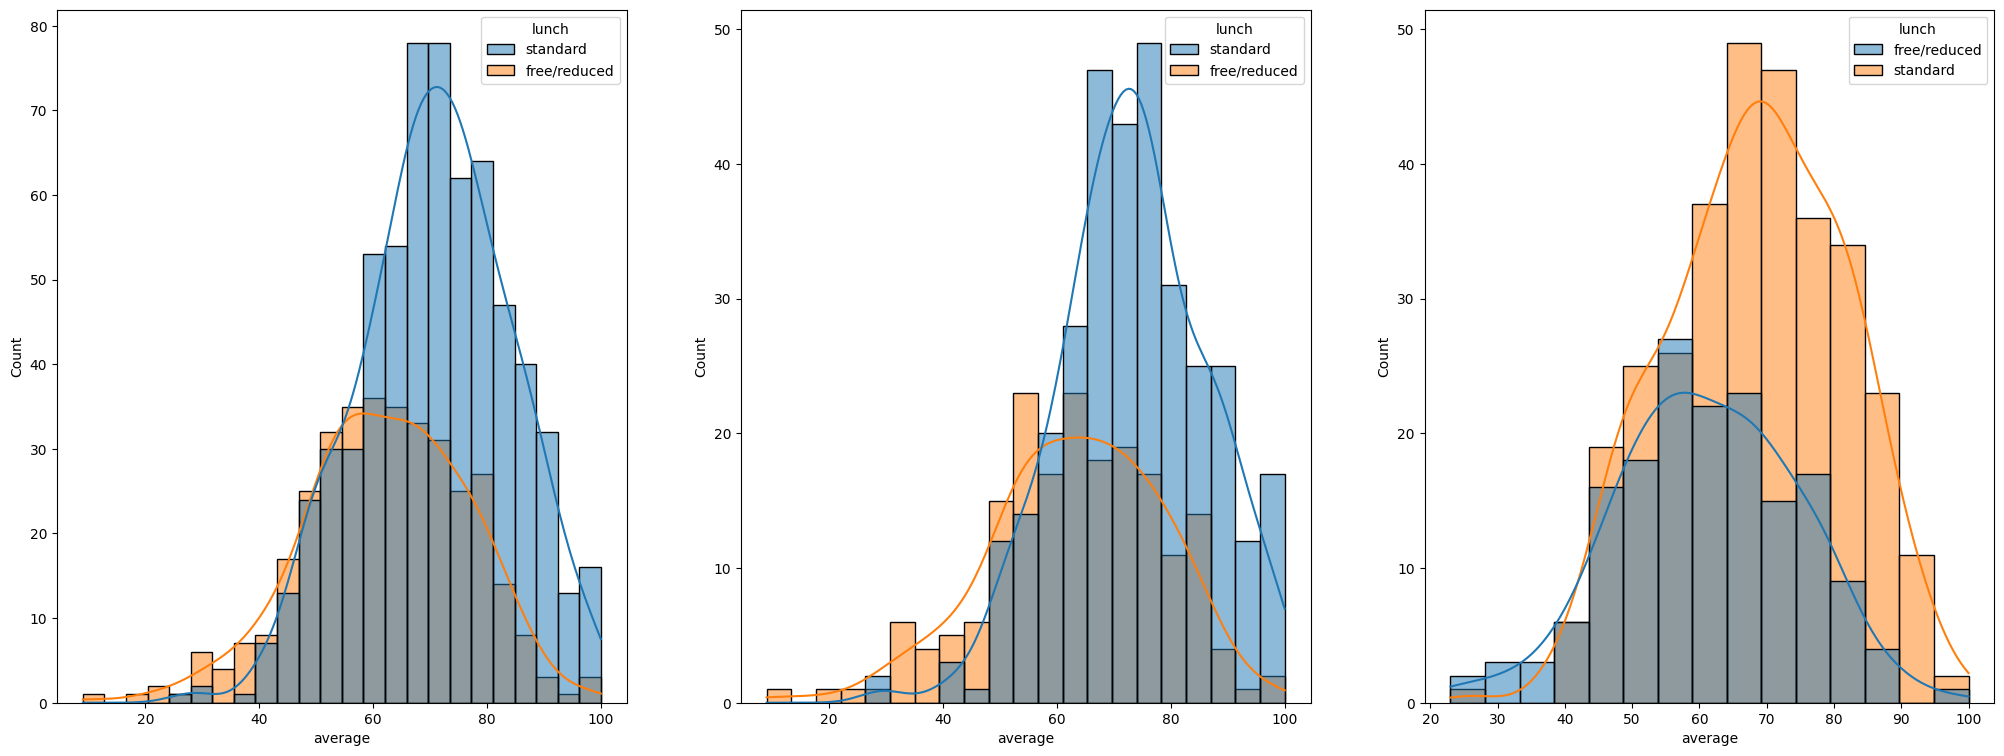

In [21]:
plt.figure(figsize=(25,9))
plt.subplot(1,3,1)
sns.histplot(data=df,x=df['average'],kde=True,hue='lunch')
plt.subplot(1,3,2)

sns.histplot(data=df[df['gender']=='female'],x=df['average'],kde=True,hue='lunch')
plt.subplot(1,3,3)

sns.histplot(data=df[df['gender']=='male'],x=df['average'],kde=True,hue='lunch')

plt.show()

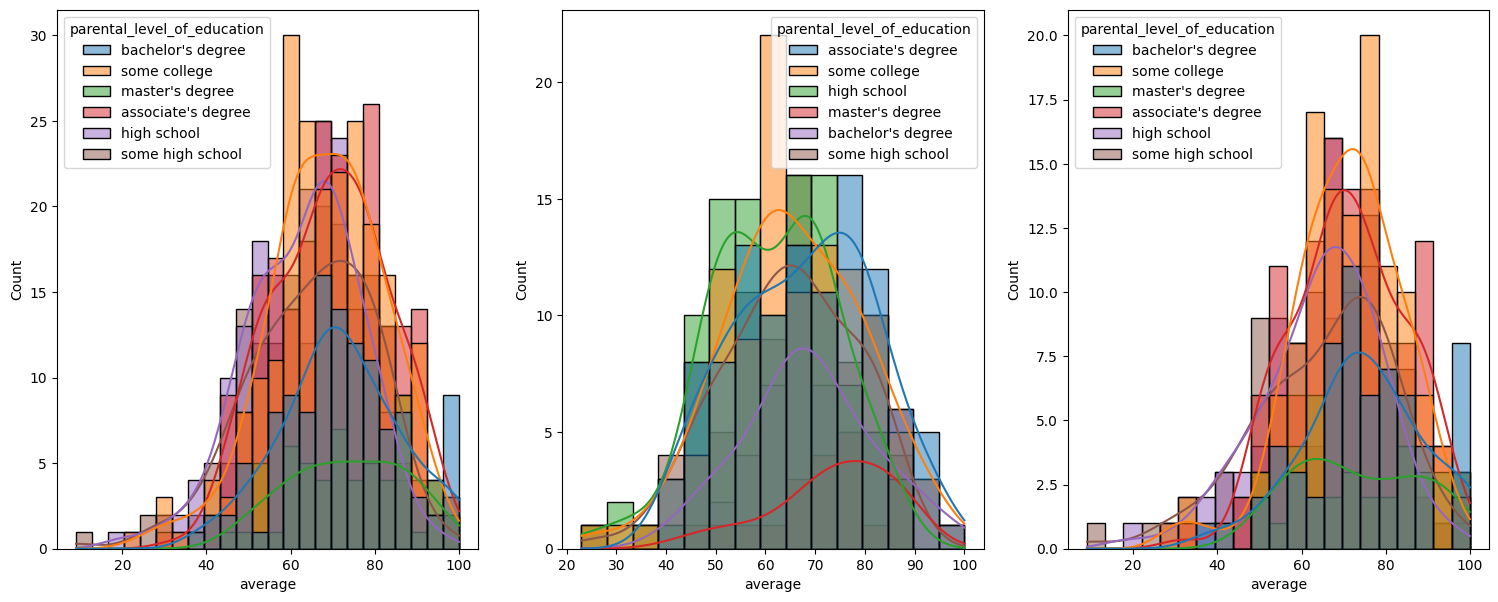

In [22]:
plt.figure(figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [23]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

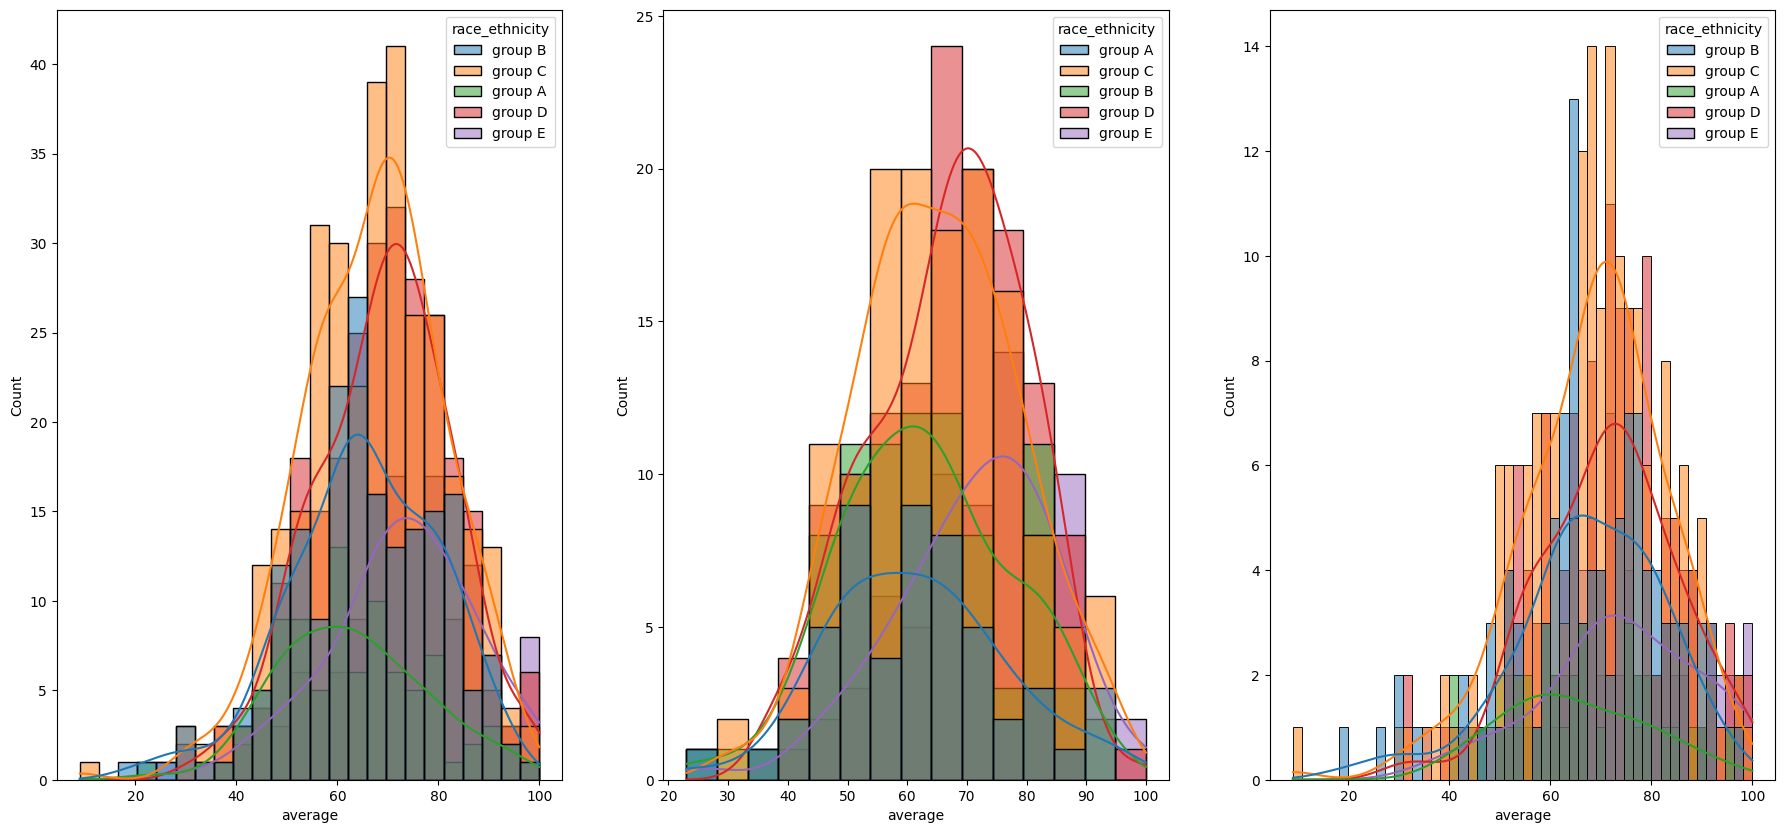

In [24]:
plt.figure(figsize=(30,10))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',bins=50)
plt.show()

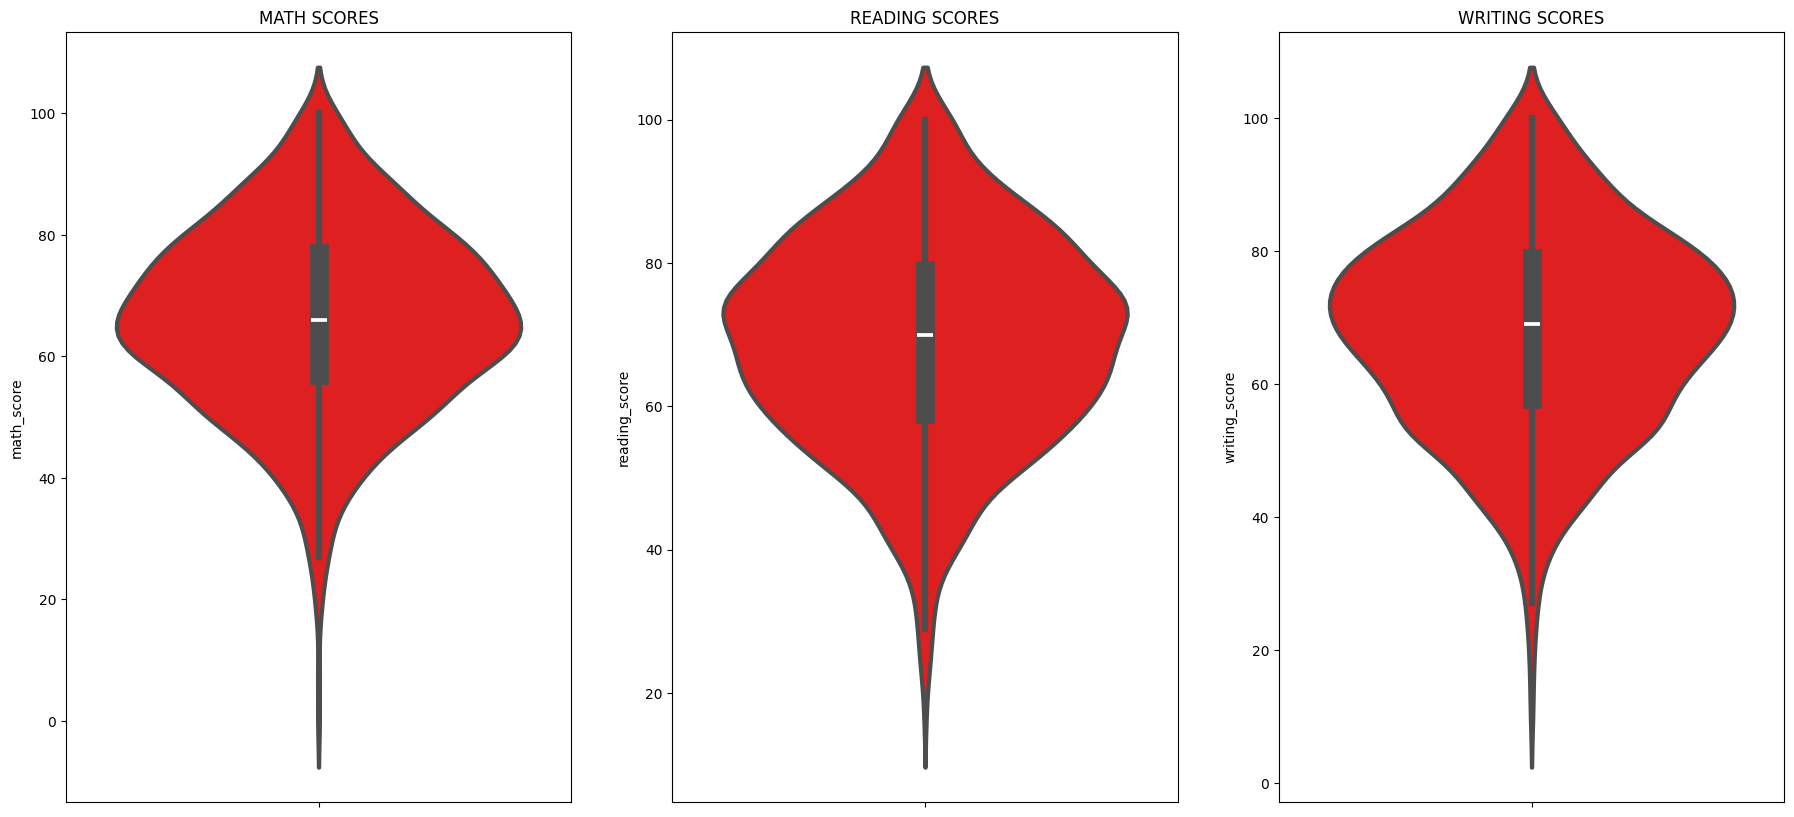

In [25]:
plt.figure(figsize=(30,10))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='red',linewidth=3)
plt.show()

([<matplotlib.patches.Wedge at 0x197969b1f70>,
 [Text(0.8341981156790161, 0.717017087521336, 'some college'),
  Text(-0.5717990621018805, 0.939705183863221, "associate's degree"),
  Text(-1.0543739750814827, -0.3135211646298753, 'high school'),
  Text(-0.11383566476996158, -1.0940938905900084, 'some high school'),
  Text(0.8112644257554884, -0.7428660925790178, "bachelor's degree"),
  Text(1.0811581857178525, -0.20272389463327067, "master's degree")],
 [Text(0.45501715400673604, 0.3911002295570923, '22.600000%'),
  Text(-0.31189039751011655, 0.5125664639253932, '22.200000%'),
  Text(-0.5751130773171723, -0.1710115443435683, '19.599999%'),
  Text(-0.062092180783615405, -0.5967784857763682, '17.900001%'),
  Text(0.44250786859390273, -0.4051996868612824, '11.800000%'),
  Text(0.5897226467551923, -0.1105766697999658, '5.900000%')])

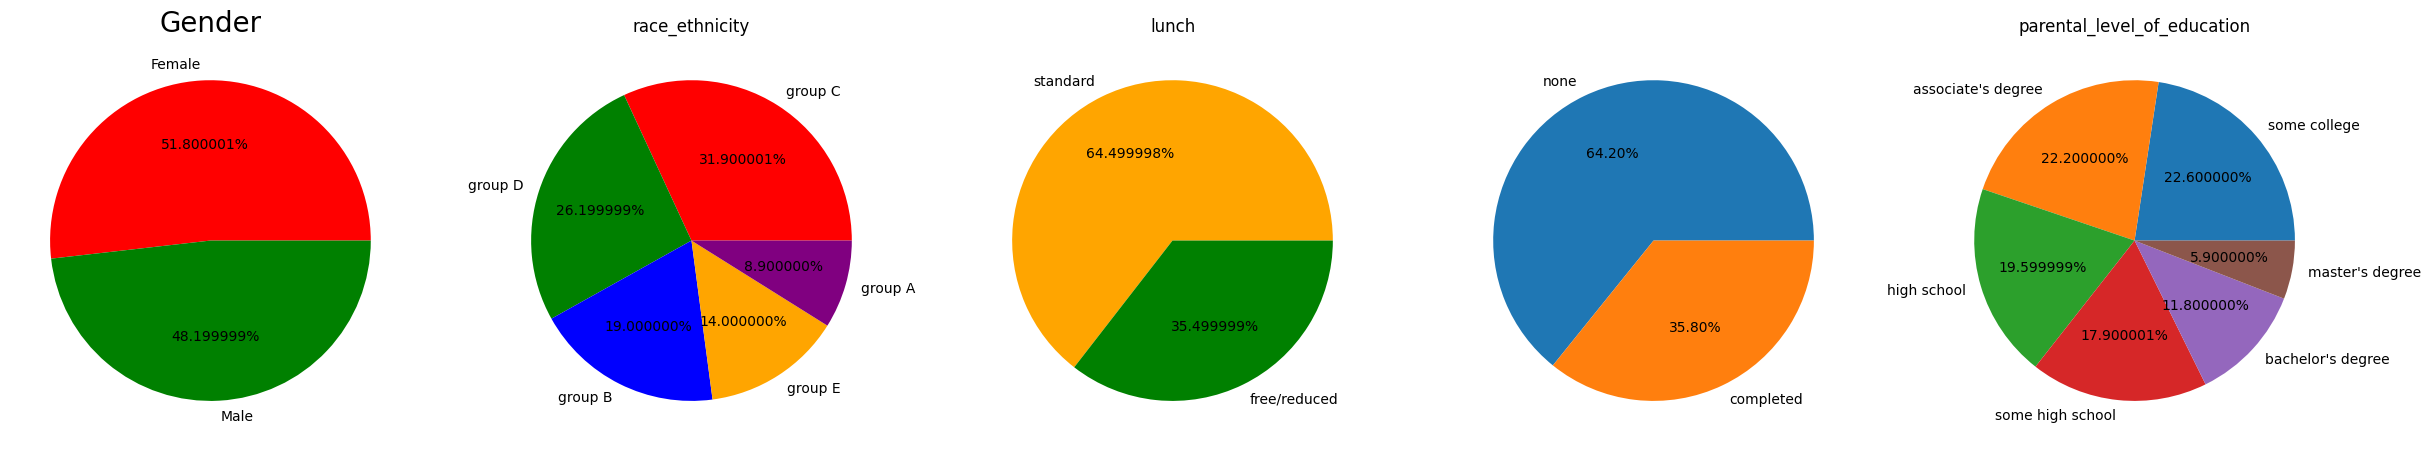

In [26]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()

color=['red','green','blue','orange','purple']

plt.pie(size,colors=color,autopct='%2f%%',labels=size.index)
plt.title('race_ethnicity')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()

color=['orange','green']

plt.pie(size,colors=color,autopct='%2f%%',labels=size.index)
plt.title('lunch')


plt.subplot(1,5,4)
# size=df['test_preparation_course'].value_counts()
# labels='none','completed'
# color=['cyan','indigo']

# plt.pie(size,colors=color,autopct='%2f%%',labels=labels)
# plt.title('test course ')
size = df['test_preparation_course'].value_counts()

plt.pie(
    size,
    labels=size.index,
    autopct='%.2f%%'
)
plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
plt.title('parental_level_of_education')

plt.pie(size,labels=size.index,autopct='%2f%%')



In [27]:
df.lunch.unique()
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


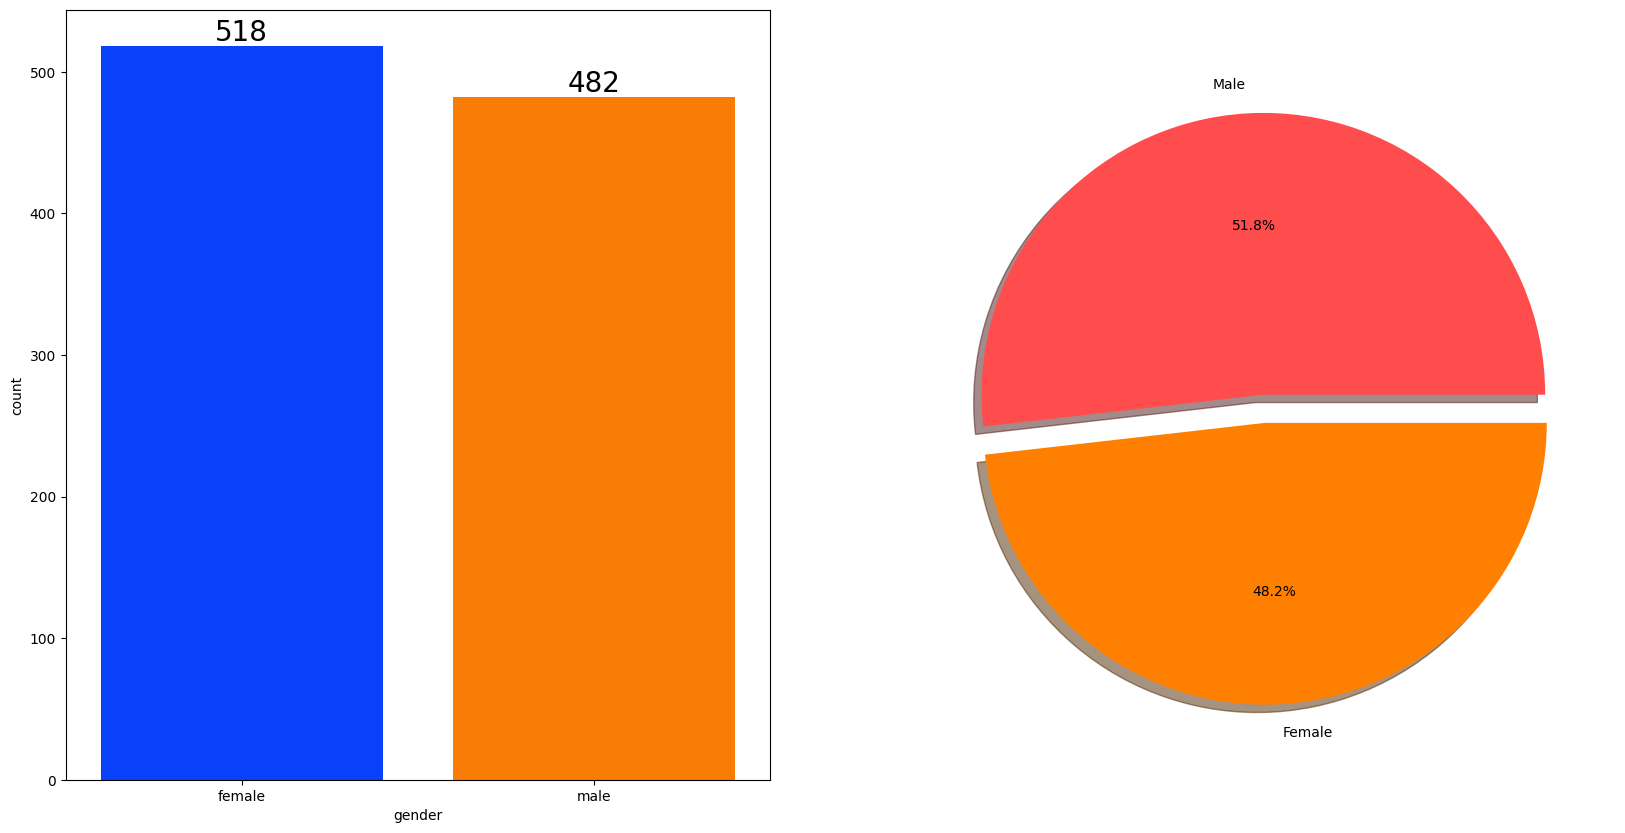

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'],data=df,saturation=0.95,palette='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

ax[1].pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [29]:
gender_group=df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


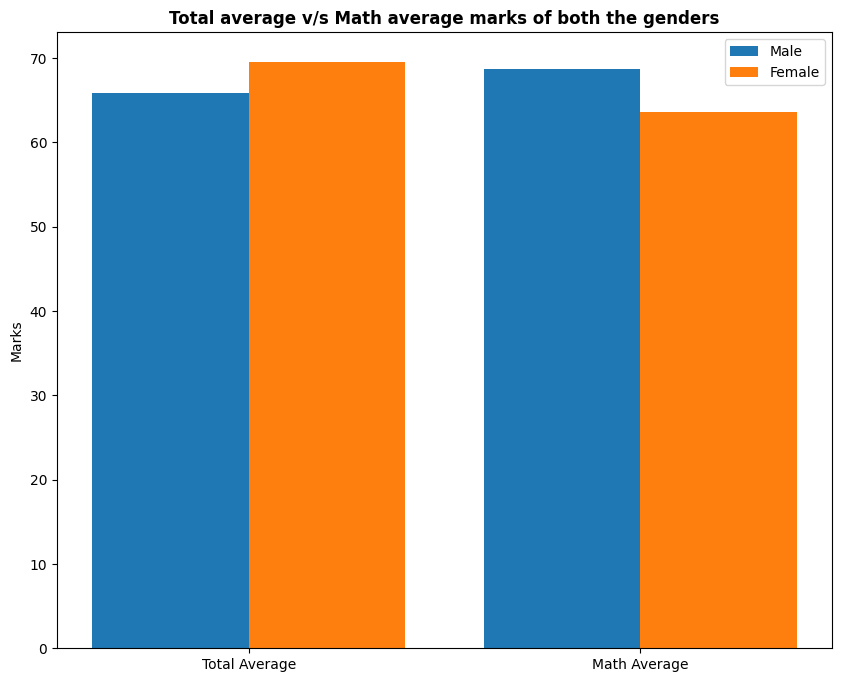

In [30]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


# female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
# male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

female_scores=[
    gender_group.loc['female','average'],
     gender_group.loc['female','math_score']
]
male_scores=[
    gender_group.loc['male','average'],
     gender_group.loc['male','math_score']
]



X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

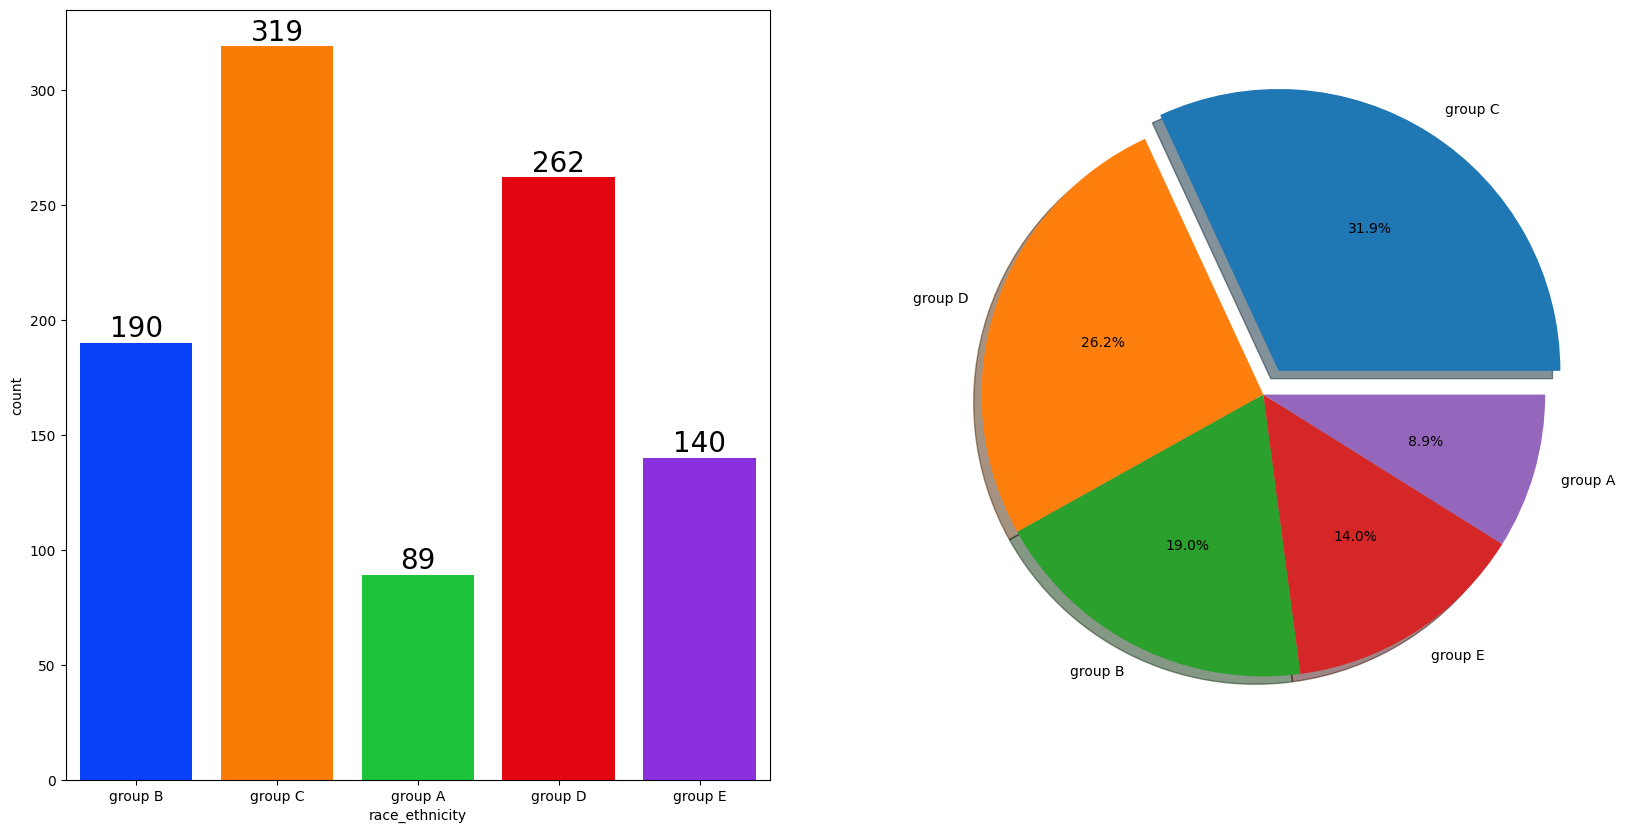

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

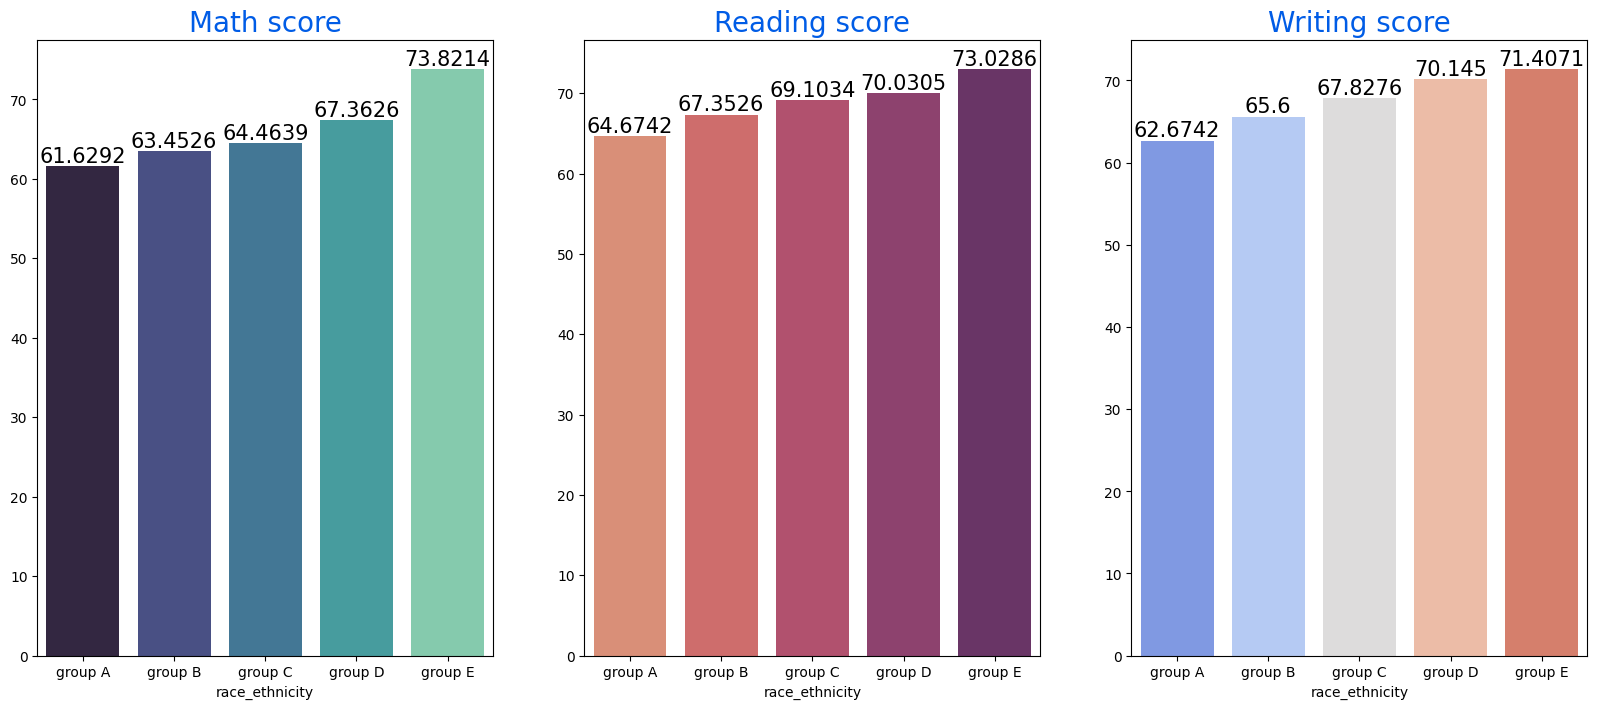

In [32]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

<Axes: xlabel='parental_level_of_education', ylabel='count'>

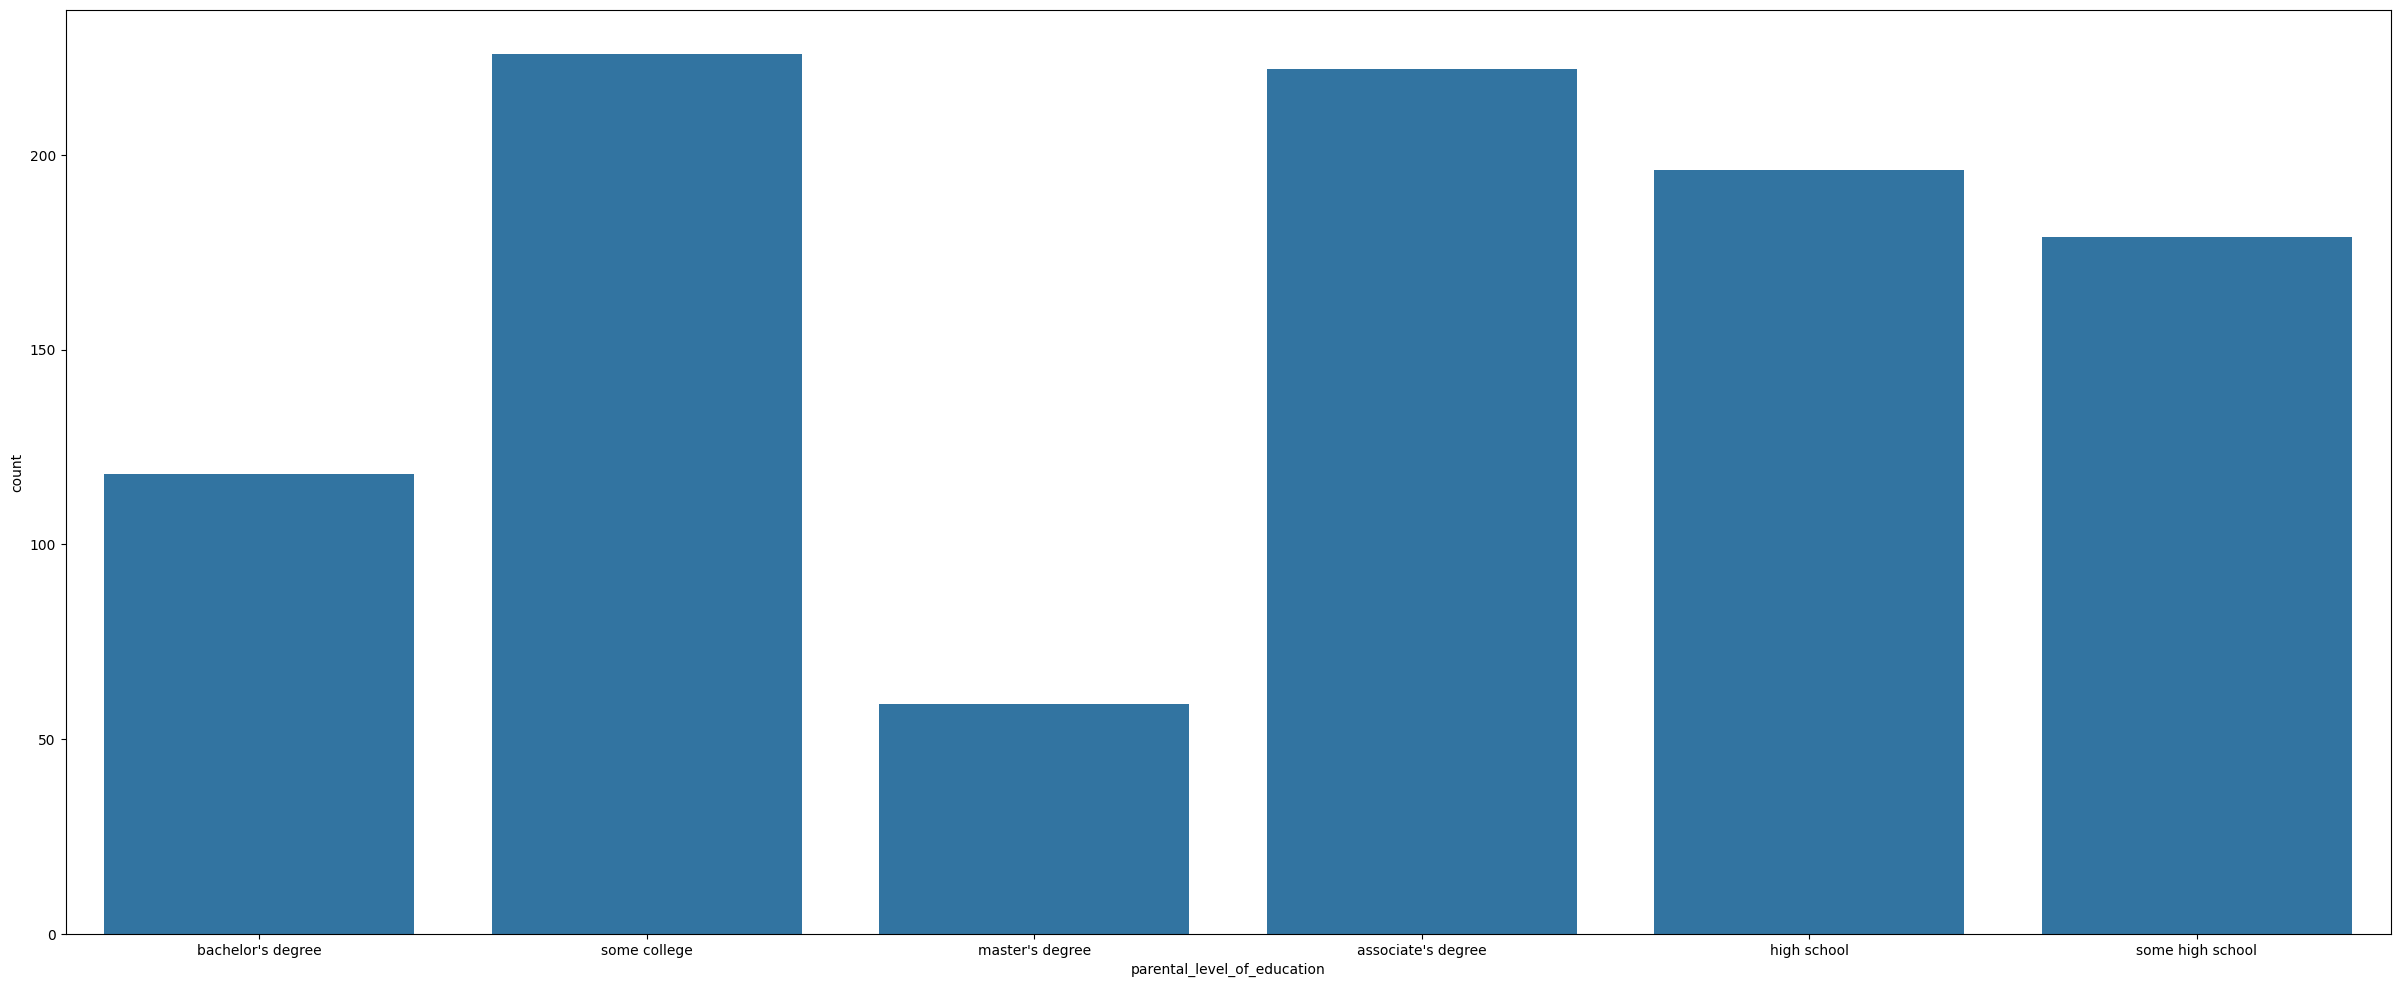

In [33]:
sns.countplot(x=df['parental_level_of_education'])

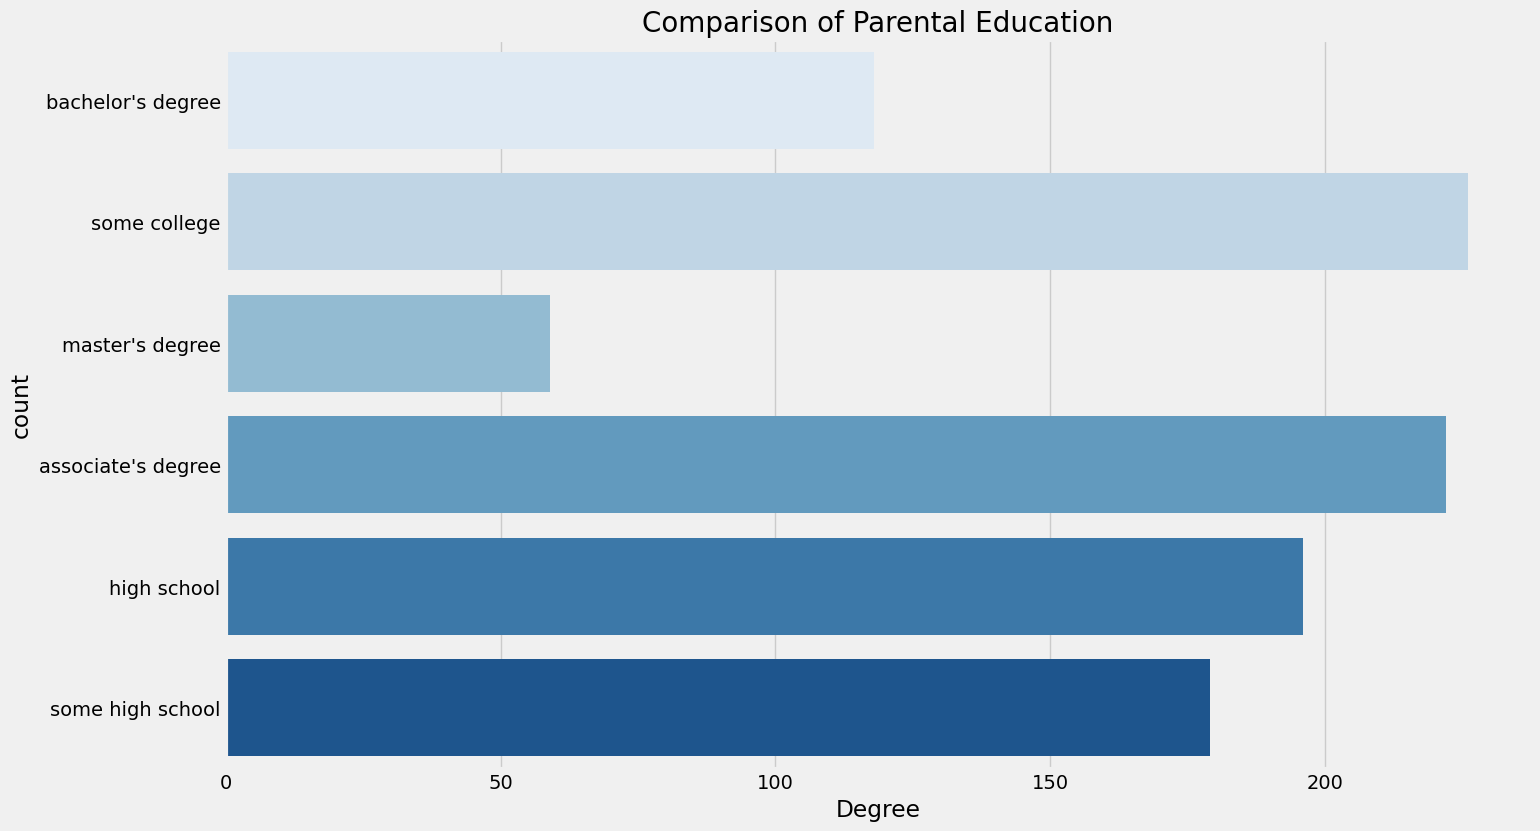

In [34]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<Axes: ylabel='parental_level_of_education'>

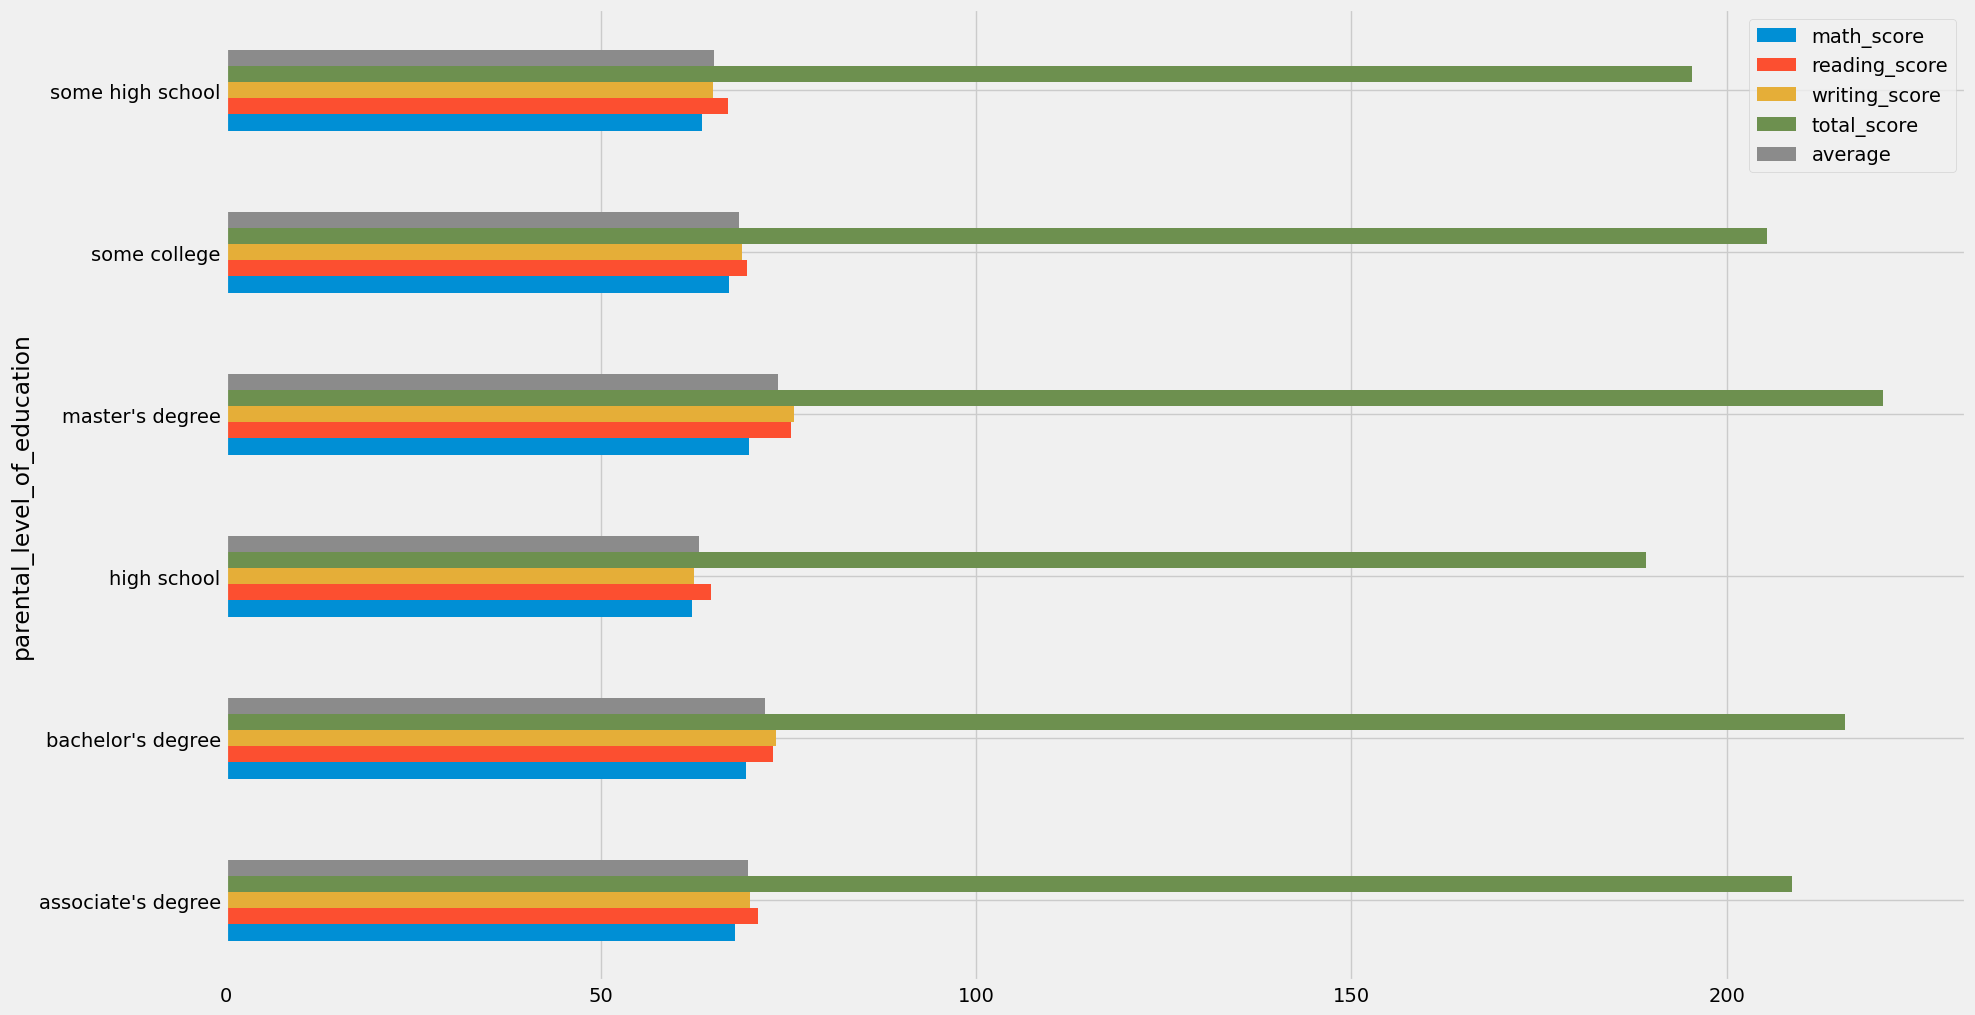

In [35]:
df.groupby('parental_level_of_education').agg('mean',numeric_only=True).plot(figsize=(20,12),kind='barh')

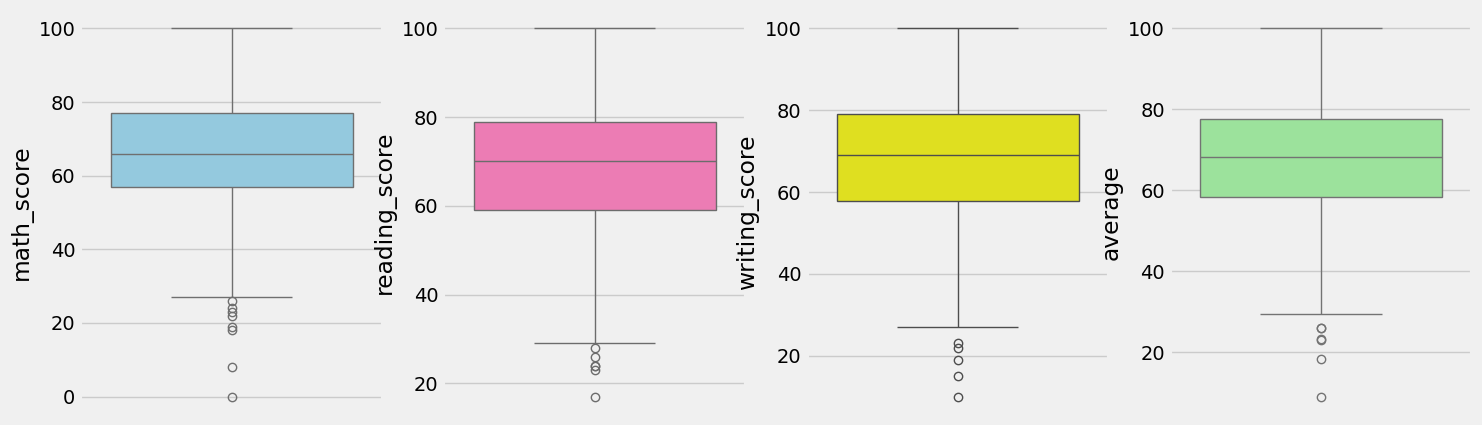

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

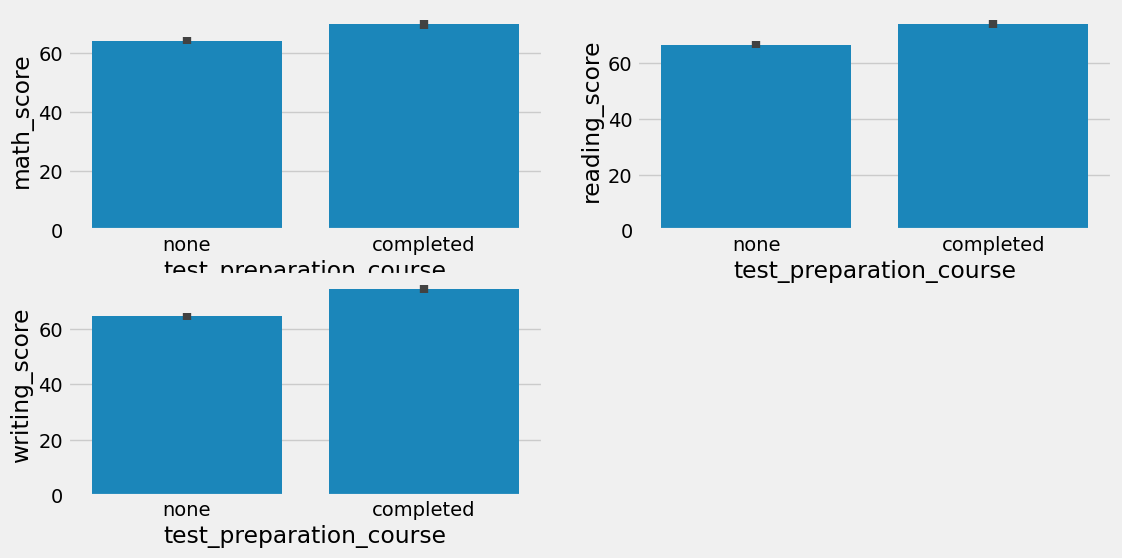

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(y=df['math_score'],x=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(y=df['reading_score'],x=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(y=df['writing_score'],x=df['test_preparation_course'])

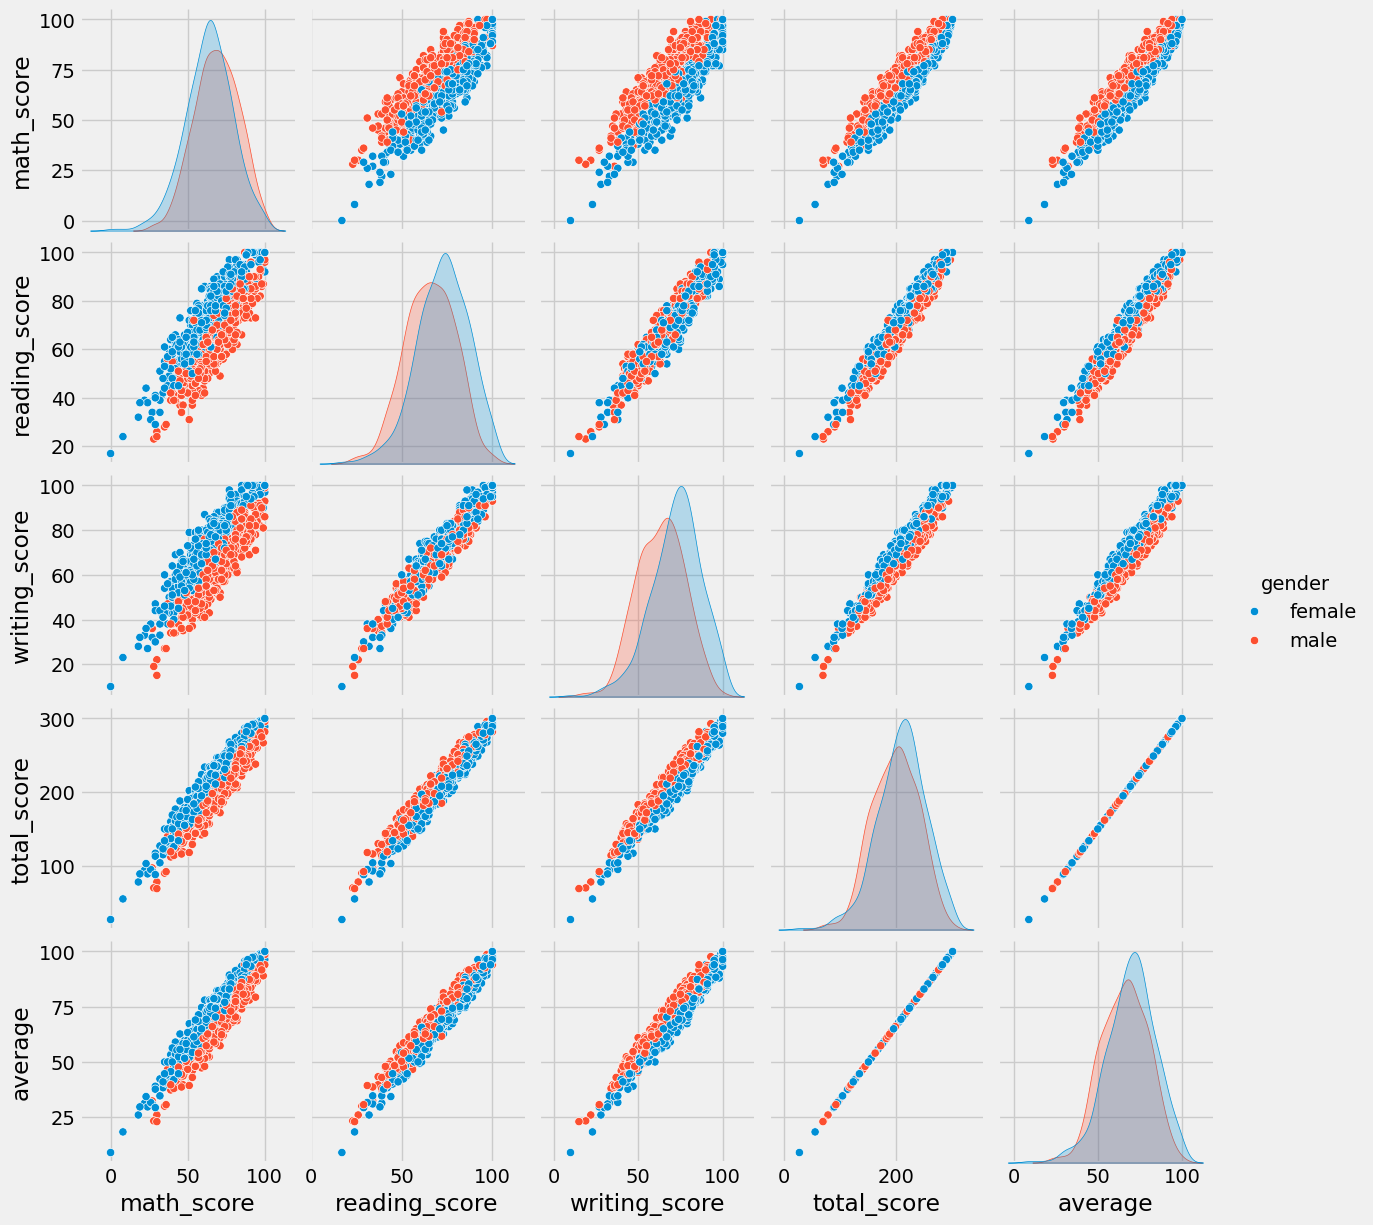

In [ ]:
sns.pairplot(df,hue='gender')

<Axes: xlabel='parental_level_of_education', ylabel='count'>

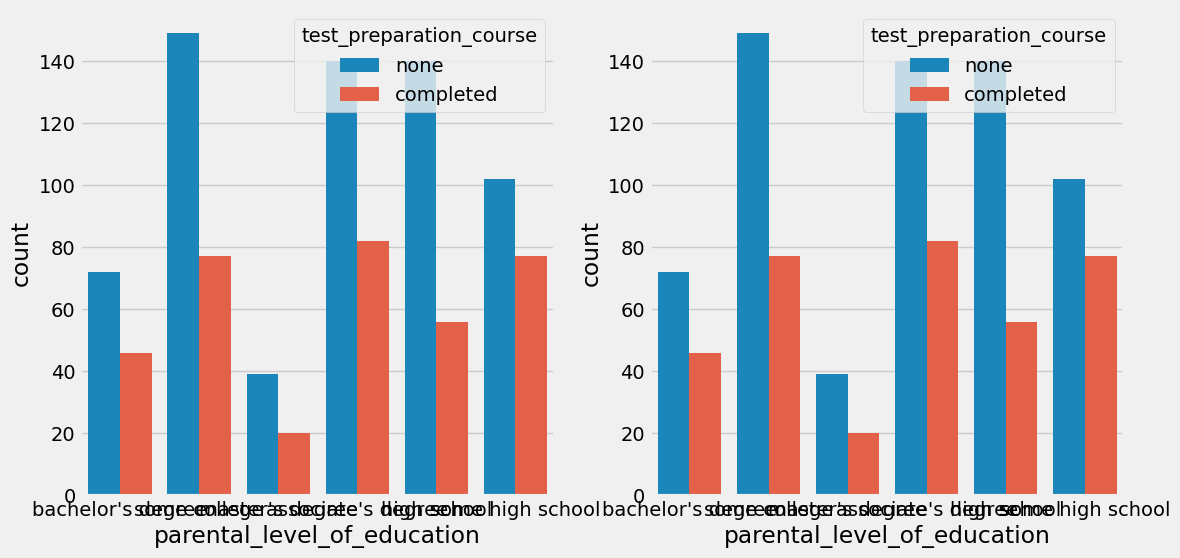

In [50]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['parental_level_of_education'],data=df,hue='test_preparation_course',ax=ax[0])
sns.countplot(x=df['parental_level_of_education'],data=df,ax=ax[1],hue='test_preparation_course')

<Axes: xlabel='count', ylabel='lunch'>

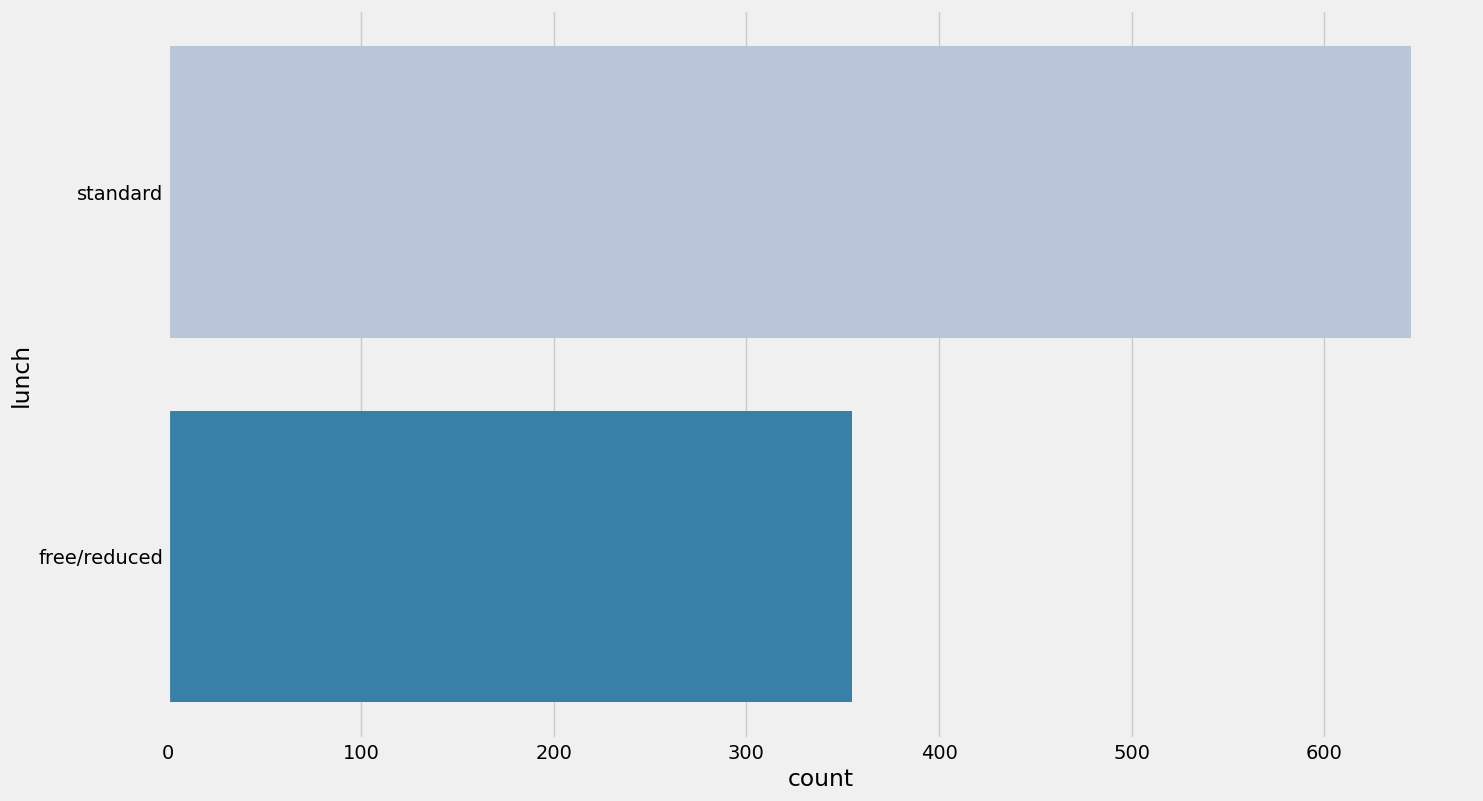

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'],palette = 'PuBu')